In [5]:
import numpy as np

x=np.array([[1,2],[3,4],[5,3],[3,5],[7,3],[6,1],[5,1],[4,9],[3,4],[6,3]])
x

array([[1, 2],
       [3, 4],
       [5, 3],
       [3, 5],
       [7, 3],
       [6, 1],
       [5, 1],
       [4, 9],
       [3, 4],
       [6, 3]])

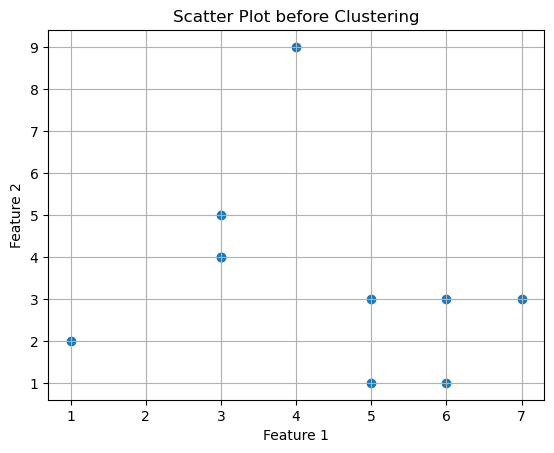

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot before Clustering")
plt.grid(True)
plt.show()

In [12]:
#K-Means Clustering
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
#model=kmeans.fit(x)
#labels=kmeans.fit_predict(x)
labels=kmeans.fit_predict(x)
print(labels)
print(kmeans.cluster_centers_)

[0 0 1 0 1 1 1 2 0 1]
[[2.5  3.75]
 [5.8  2.2 ]
 [4.   9.  ]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


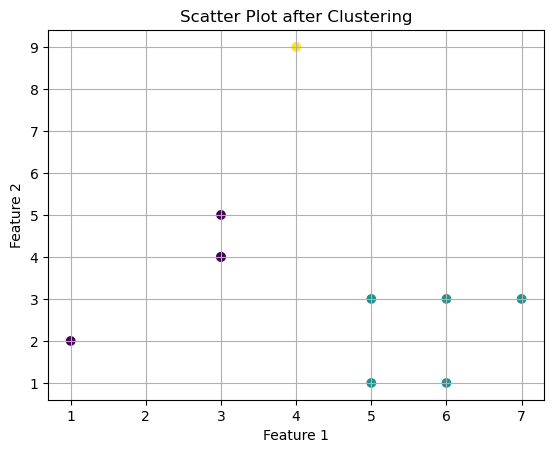

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot After Clustering")
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("")
plt.grid(True)
plt.show()

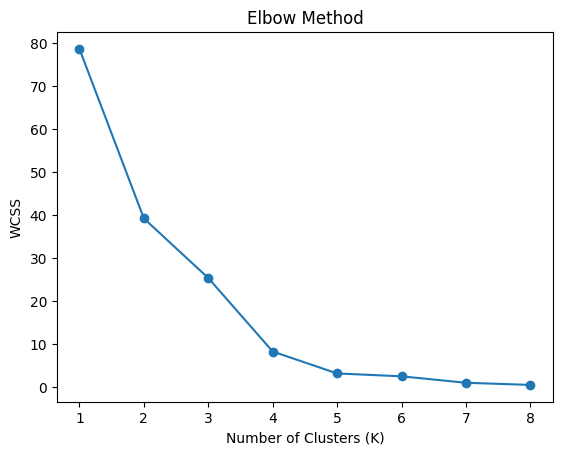

In [2]:
'''
Elbow method : 
    Plot K vs WCSS(within class square sum error)
    Elbow point gives optimal K
'''
#Elbow Method for optimal K
from sklearn.cluster import KMeans
import numpy as np

X=np.array([[1,2],[3,4],[5,3],[3,5],[7,3],[6,1],[5,1],[4,9],[3,4],[6,3]])
wcss=[]
for k in range(1,9):
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,9),wcss,marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()